## 1- Preprocessing 

In [168]:
# Importing Libraries
import pandas as pd
import matplotlib as mp
import seaborn as sb
import numpy as np

In [169]:
data = pd.read_csv("titanic-passengers.csv", sep=";")
new_data = pd.DataFrame.copy(data)

# Displaying the first five rows of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [170]:
# concise summary of a DataFrame.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [171]:
# Showing descriptive statistics
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,No,NaN,"Collander, Mr. Erik Gustaf",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,549,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [172]:
# Changing survived and Sex columns from categorical to numerical
# for survived: yes = 1, no = 0
# for Sex: male = 1, female = 0
new_data["Survived"] = new_data["Survived"].map({"Yes":1, "No":0})
new_data["Sex"] = new_data["Sex"].map({"male":1, "female":0})

# One-hot-Encoding the Embarked column
new_data = pd.get_dummies(new_data, columns=["Embarked"])

new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,0,0,1


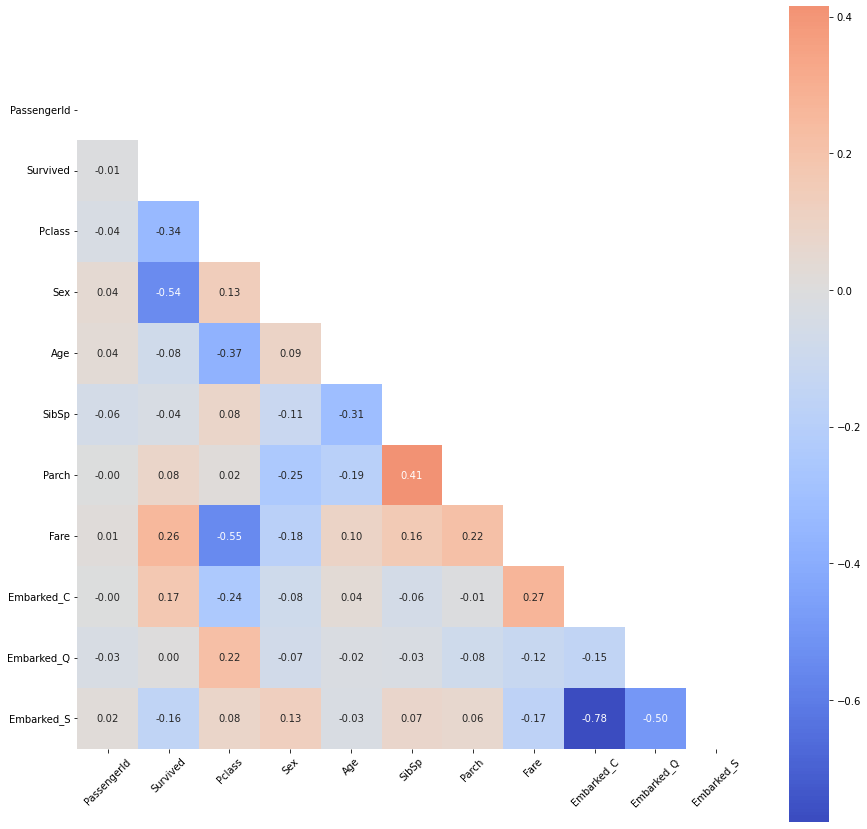

In [173]:
# Finding correlations between features and outcome
def dataCorr(data):
    data_corr = data.corr()
    mask = np.zeros_like(data_corr)
    mask[np.triu_indices_from(mask)] = True
    mp.pyplot.subplots(figsize=(15, 15))
    dataplot = sb.heatmap(data_corr, annot=True, cmap="coolwarm", mask=mask, center=0, square=True, fmt=".2f")
    mp.pyplot.xticks(rotation = 45)
    mp.pyplot.show()
    
dataCorr(new_data)

In [174]:
# Finding missing values
new_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [175]:
# Removed columns that I found to be useless
new_data.drop(columns=["Cabin", "Ticket"], inplace=True)

# Filling in the missing cabins
# new_data["Cabin"] = new_data["Cabin"].fillna("G6")

In [176]:
# Finding missing values
new_data.isnull().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

#### 1.1- Data Cleaning
##### Finding outliers:
- Finding the rows that are considered outliers and removing them from the dataset we have

In [177]:
from collections import Counter


def detectOutliers(data, n, features):
    outlier_rows = []
    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        outlierStep = IQR * 1.5
        outlierList = data[(data[col] < Q1 - outlierStep ) | (data[col] > Q3 + outlierStep)].index
        outlier_rows.extend(outlierList)
    # Counts the frequency of occurrences of each row index
    outlier_rows = Counter(outlier_rows)
    multiple_outliers = list(key for key, value in outlier_rows.items() if value > n)
    return multiple_outliers

outliers_to_drop = detectOutliers(new_data, 2, ["Age", "SibSp", "Fare", "Parch"])
print("these rows will be dropped due to their outlier values: {} ".format(outliers_to_drop))

these rows will be dropped due to their outlier values: [108, 203, 333, 381, 491, 549, 566, 575, 672, 722] 


In [178]:
print("Before removing the outliers we have {} rows".format(len(new_data)))
new_data = new_data.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print("After removing the outliers we have {} rows".format(len(new_data)))

Before removing the outliers we have 891 rows
After removing the outliers we have 881 rows


## 2- Visualisation Phase

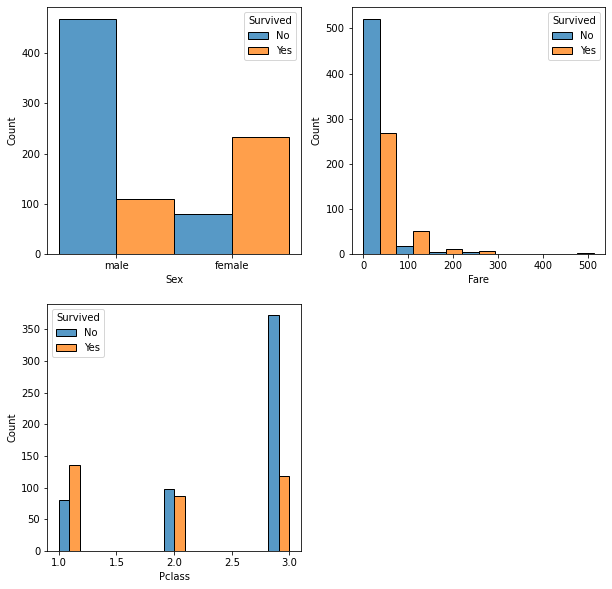

In [179]:
# ["Sex", "Fare", "Pclass", "Embarked_C", "Embarked_Q", "Embarked_S"]

mp.pyplot.subplots(figsize=(10, 10))
mp.pyplot.subplot(2, 2, 1)
sb.histplot(data = data, x = "Sex", hue = "Survived", multiple="dodge")
mp.pyplot.subplot(2, 2, 2)
sb.histplot(data = data, x = "Fare", hue = "Survived", multiple="dodge", bins = 7)
mp.pyplot.subplot(2, 2, 3)
sb.histplot(data = data, x = "Pclass", hue = "Survived", multiple="dodge")
mp.pyplot.show()

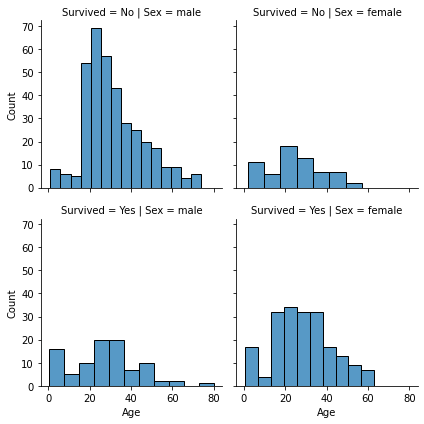

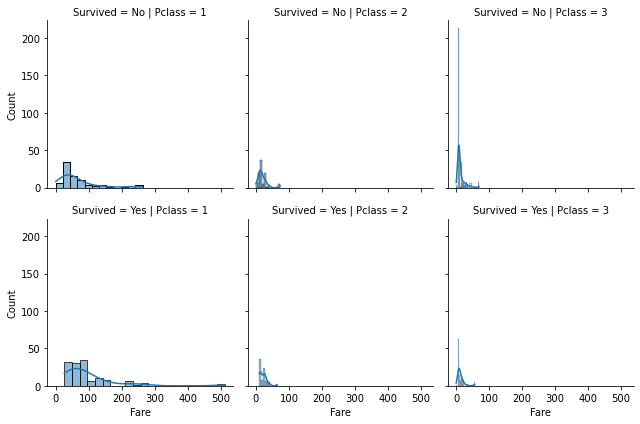

In [180]:
grid = sb.FacetGrid(data, col="Sex", row="Survived")
grid.map(sb.histplot, "Age")

grid = sb.FacetGrid(data, col="Pclass", row="Survived", legend_out=True)
grid.map(sb.histplot, "Fare", kde = True)



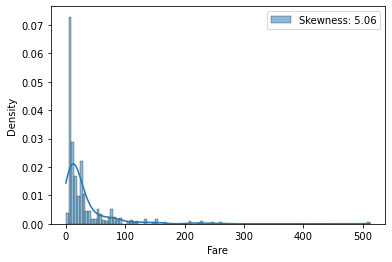

In [181]:
g = sb.histplot(data = new_data,x="Fare", kde=True, stat="density", label=("Skewness: {}".format(round(new_data["Fare"].skew(), 2))))
g.legend()

#### 2.2- Observation
##### from the FacetGrids and Histoplots:
- The Fare is positively skewed making alot of the points seem like an outlier

In [182]:
# Fixing the skewness of the fare values
new_data["Fare"] = new_data["Fare"].map(lambda x: np.log(x) if x > 0 else 0)

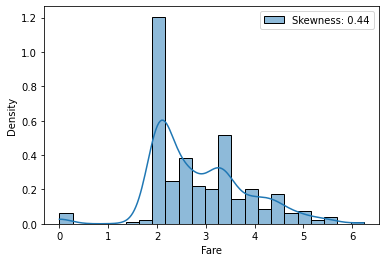

In [183]:
g = sb.histplot(data = new_data,x="Fare", kde=True, stat="density", label=("Skewness: {}".format(round(new_data["Fare"].skew(), 2))))
g.legend()

#### 2.2- Observation
##### from the FacetGrids:
- The lower the fare, the more likely the person was on a lower Pclass
  - More people survived than died from Pclass 1
  - the survived to died ratio were very close to the ones in Pclass 2
  - Pclass 3 had the most casualties
- Most passengers were between the age 20 and 40
  - More Males died than Females
  - More Females survived than Males

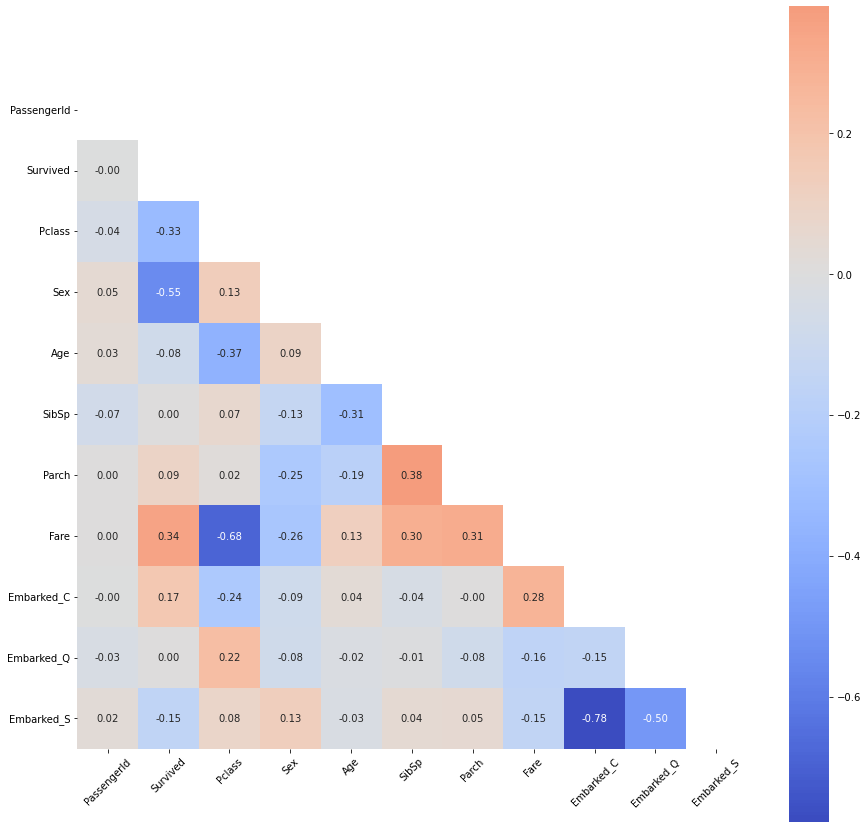

In [184]:
dataCorr(new_data)

In [185]:
missingAge = list(new_data[new_data["Age"].isnull()].index)
len(missingAge)

170

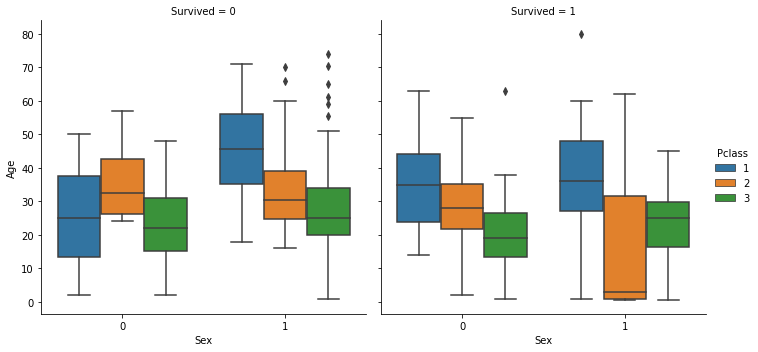

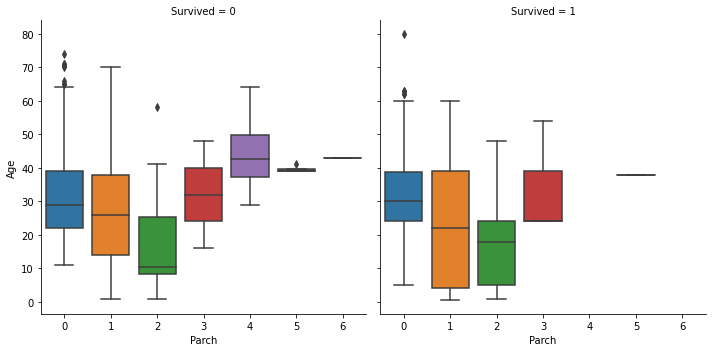

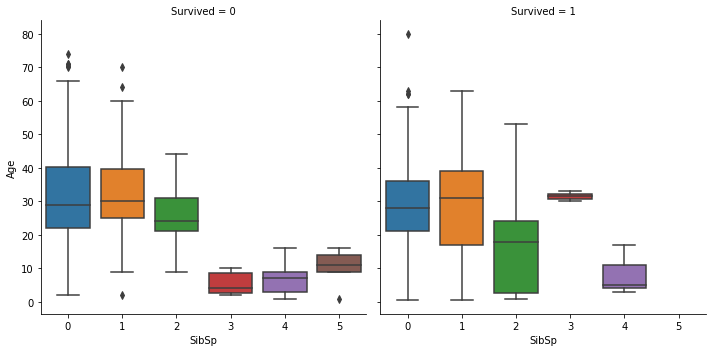

In [186]:
g = sb.catplot(data=new_data, x="Sex", y="Age", hue="Pclass", kind="box", col="Survived")
g = sb.catplot(data=new_data, x="Parch", y="Age", kind="box", col="Survived")
g = sb.catplot(data=new_data, x="SibSp", y="Age", kind="box", col="Survived")

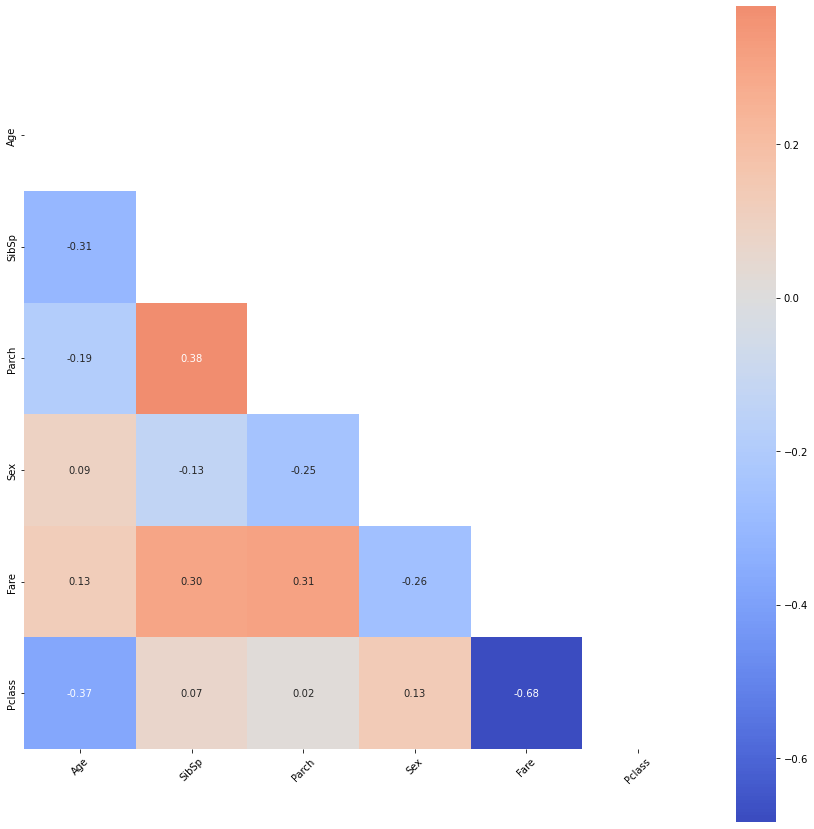

In [187]:
dataCorr(new_data[["Age", "SibSp", "Parch", "Sex", "Fare", "Pclass"]])

#### 2.3- Observation
##### from the correlation graph:
- We can see that Age is in correlated with sex or Fare much
- Age is correlated with Pclass, Parch, and SibSp

In [188]:
# Filling in the missing age values with the median of values that have the same Sibsp, Parch and Pclass values
# or filling it with the median of all the values combined

for i in missingAge:
    medianAge = new_data["Age"].dropna().median()
    AssumedAge = new_data["Age"][(new_data["SibSp"] == new_data.iloc[i]["SibSp"])
                                 & (new_data["Parch"] == new_data.iloc[i]["Parch"])
                                 & (new_data["Pclass"] == new_data.iloc[i]["Pclass"])].median()
    if np.isnan(AssumedAge):
        new_data["Age"][i] = medianAge
    else:
        new_data["Age"][i] = AssumedAge
        
# print(AssumedAge)

C:\Users\ziadh\AppData\Local\Temp\ipykernel_11764\2850203119.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Age"][i] = AssumedAge


In [189]:
new_data.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

#### 2.4- Observation
##### from the correlation graph:
- The strongest relationships with survival are: Pclass, Sex, and Fare
  - since Pclass 1 is the highest class and Pclass one is the lowest therefore, the lower the Pclass the higher the survival rate, with 33% inverse proportionality
  - For Sex Male = 1 and Female = 0 so since the data shows 55% inverse proportionality that means more Females have survived the accident.
  - The higher the Fare the more likely the passenger was on a higher class therefor higher rate of survival with Fare being 26% proportional to Survival

In [190]:
new_data[["Pclass", "Survived"]].groupby("Pclass", as_index=False).mean()

,Pclass,Survived
0,1,0.629108
1,2,0.472826
2,3,0.245868


In [191]:
# Changing the names to their title

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr": "Officer",
    "Rev": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Lady": "Royalty",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Miss",
    "Mlle": "Miss",
    "Miss" : "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs": "Mrs",
    "Master": "Master"
}

new_data.rename(columns={"Name": "Title"}, inplace=True)
for index, Row in new_data.iterrows():
    for title in Title_Dictionary:
        if title in Row["Title"]:
            new_data["Title"][index]= Title_Dictionary.get(title)


new_data.head()

C:\Users\ziadh\AppData\Local\Temp\ipykernel_11764\456336965.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Title"][index]= Title_Dictionary.get(title)


,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,343,0,2,Mr,1,28.0,0,0,2.564949,0,0,1
1,76,0,3,Mr,1,25.0,0,0,2.034706,0,0,1
2,641,0,3,Mr,1,20.0,0,0,2.061048,0,0,1
3,568,0,3,Mrs,0,29.0,0,4,3.048088,0,0,1
4,672,0,1,Mr,1,31.0,1,0,3.951244,0,0,1


In [192]:
new_data[["Title", "Survived"]].groupby("Title", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Title,Survived
3,Mrs,0.792308
1,Miss,0.711864
0,Master,0.589744
5,Royalty,0.333333
4,Officer,0.277778
2,Mr,0.159533


In [193]:
# Adding the SibSp and Parch columns into one column called FamilySize

new_data["FamilySize"] = new_data["Parch"] + new_data["SibSp"] + 1

new_data.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,343,0,2,Mr,1,28.0,0,0,2.564949,0,0,1,1
1,76,0,3,Mr,1,25.0,0,0,2.034706,0,0,1,1
2,641,0,3,Mr,1,20.0,0,0,2.061048,0,0,1,1
3,568,0,3,Mrs,0,29.0,0,4,3.048088,0,0,1,5
4,672,0,1,Mr,1,31.0,1,0,3.951244,0,0,1,2


In [194]:
new_data[["FamilySize", "Survived"]].groupby("FamilySize", as_index=False).mean().sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000


In [195]:
# Creating a feature called isAlone to determine if the passenger is alone or not

new_data["isAlone"] = 0
new_data.loc[new_data["FamilySize"] == 1, "isAlone"] = 1
new_data[["FamilySize", "isAlone"]].head()

,FamilySize,isAlone
0,1,1
1,1,1
2,1,1
3,5,0
4,2,0


In [196]:
new_data[["isAlone", "Survived"]].groupby("isAlone", as_index=False).mean().sort_values(by="Survived", ascending=False)

,isAlone,Survived
0,0,0.514535
1,1,0.303538


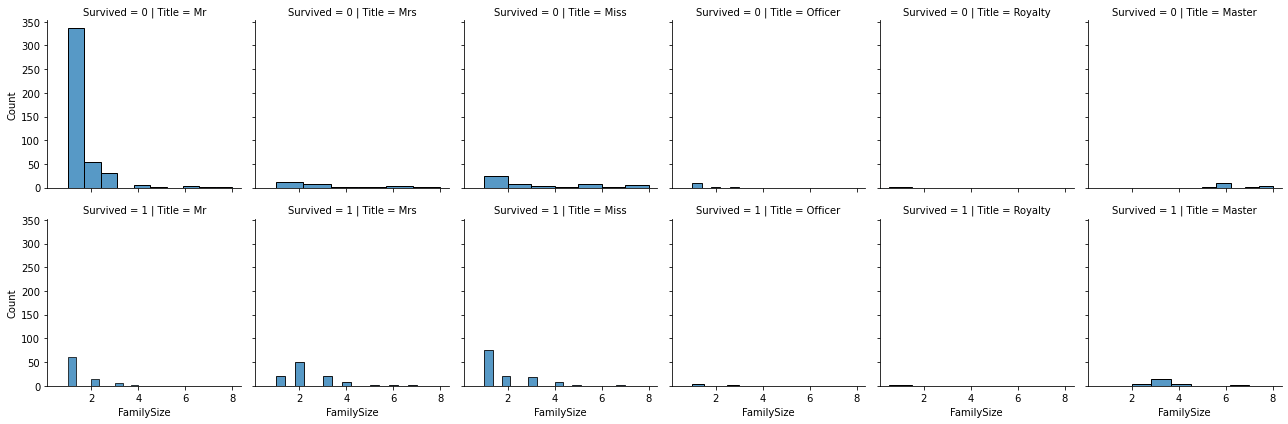

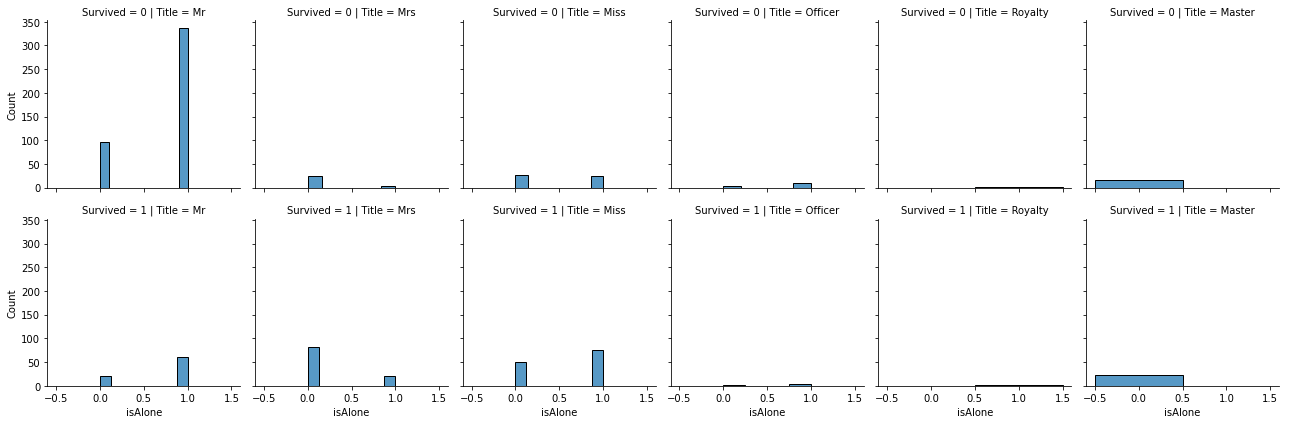

In [197]:
# Displaying the correlation between (Title, FamilySize and Survived) and (Title, Fare and Survived)
grid = sb.FacetGrid(new_data, col="Title", row="Survived")
grid.map(sb.histplot, "FamilySize")

grid = sb.FacetGrid(new_data, col="Title", row="Survived")
grid.map(sb.histplot, "isAlone")
grid.add_legend()

In [198]:
new_data.drop(columns=["FamilySize", "SibSp", "Parch"], inplace=True)

# new_data.head()

In [199]:
new_data = pd.get_dummies(new_data, columns=["Title"])

new_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,isAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,343,0,2,1,28.0,2.564949,0,0,1,1,0,0,1,0,0,0
1,76,0,3,1,25.0,2.034706,0,0,1,1,0,0,1,0,0,0
2,641,0,3,1,20.0,2.061048,0,0,1,1,0,0,1,0,0,0
3,568,0,3,0,29.0,3.048088,0,0,1,0,0,0,0,1,0,0
4,672,0,1,1,31.0,3.951244,0,0,1,0,0,0,1,0,0,0


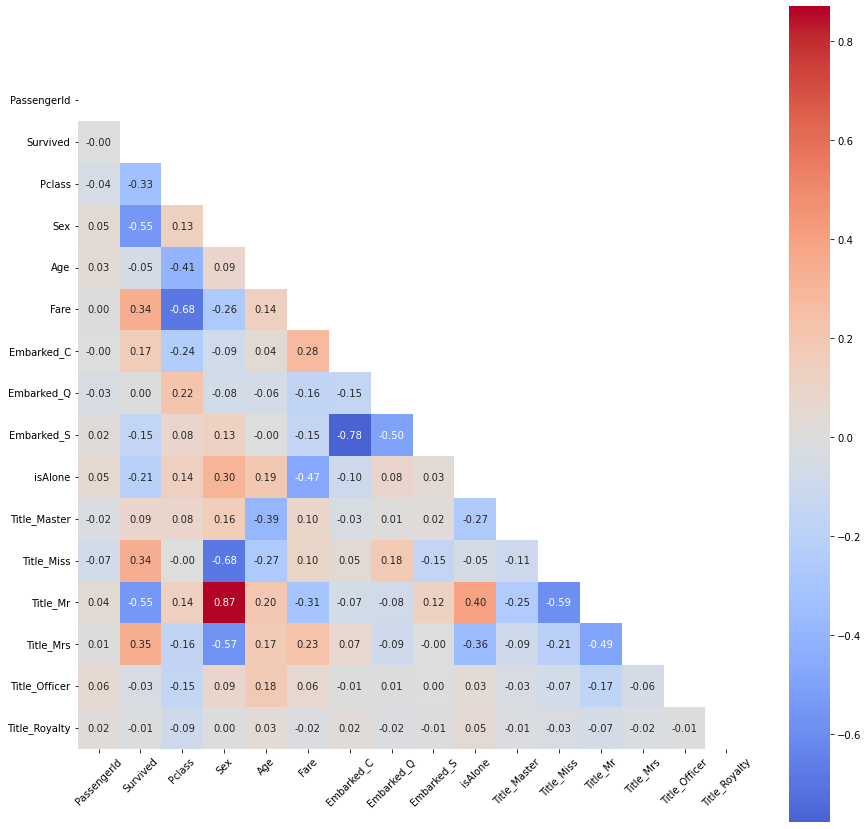

In [200]:
# Displaying the correlation of all the data after adding title and familysize to the equation
dataCorr(new_data)

#### 2.5- Observation
##### from the correlation and FacetGrid graph:
- Noticed few useless features that dont have much of an effect on the survival rate of the passangers such as:
  - Title_Royalty
  - Title_Officer
  - PassengerId
- Some of the key features that are very important:
  - Fare
  - Sex
  - Pclass
- Features that have an indirect affect:
  - isAlone
  - Title_Mrs
  - Title_Mr
  - Title_Miss
  - Age

##### Dropping unnecessary features

In [201]:
new_data = new_data.drop(columns=["PassengerId", "Embarked_Q", "Title_Royalty", "Title_Master"], axis=1)

# new_data.head()

## 3- Model

In [202]:
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import graphviz

In [203]:
X = new_data.drop(columns=["Survived"], axis=1)
y = new_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [204]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

##### Applying Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

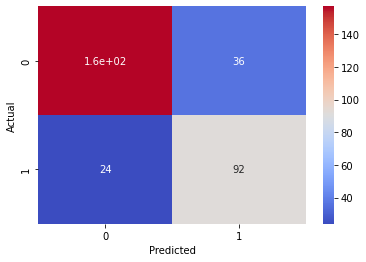

In [205]:
confusion_matrix = pd.crosstab(y_test, dt_pred, rownames=["Actual"], colnames=["Predicted"])
sb.heatmap(confusion_matrix, annot = True, cmap="coolwarm")

##### Function to measure how well the model is doing

In [206]:
def metrics(ypred, classi):
    class_report = classification_report(y_test, ypred)
    ypred_prob = classi.predict_proba(X_test)[::,1]
    fpr, tpr, thresh = roc_curve(y_test, ypred_prob)
    auc_score = round(auc(fpr, tpr), 2)
    
    #create ROC curve
    mp.pyplot.plot(fpr,tpr)
    mp.pyplot.title("ROC Curve")
    mp.pyplot.ylabel('True Positive Rate')
    mp.pyplot.xlabel('False Positive Rate')
    mp.pyplot.show()
    
    # Displaying AUC Score
    print(f"The AUC Score is: {auc_score}")
    
    # Displaying Classification Score
    print(f"\nThe Classification Score is:\n{class_report}")
    
    acc = round(accuracy_score(y_test, ypred), 2)
    prec = round(precision_score(y_test, ypred), 1)
    recall = round(recall_score(y_test, ypred), 2)

    print(f"Accuracy: {acc}\nPrecision: {prec}\nRecall: {recall}")
    return acc, prec, recall, auc_score

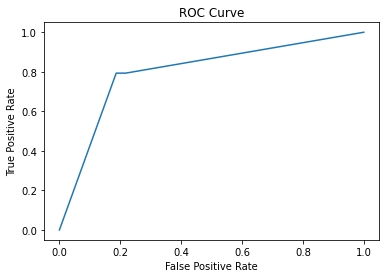

The AUC Score is: 0.8

The Classification Score is:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       193
           1       0.72      0.79      0.75       116

    accuracy                           0.81       309
   macro avg       0.79      0.80      0.80       309
weighted avg       0.81      0.81      0.81       309

Accuracy: 0.81
Precision: 0.7
Recall: 0.79


In [207]:
dt_metric = metrics(dt_pred, dt)

In [208]:
# DOT data
def graphTree(classi):
    mp.pyplot.figure(figsize=(10, 10))
    plot_tree(classi)

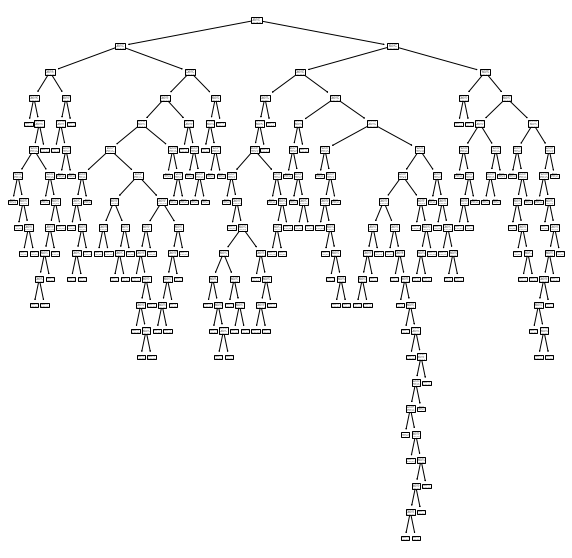

In [209]:
graphTree(dt)

In [210]:
dot_data = export_graphviz(dt, out_file=None)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

In [211]:
dt2 = DecisionTreeClassifier( max_depth=100, splitter="random", random_state=40)
dt2.fit(X_train, y_train)
dt_pred2 = dt2.predict(X_test)

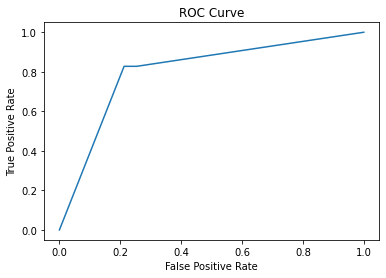

The AUC Score is: 0.8

The Classification Score is:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       193
           1       0.70      0.83      0.76       116

    accuracy                           0.80       309
   macro avg       0.79      0.81      0.80       309
weighted avg       0.82      0.80      0.81       309

Accuracy: 0.8
Precision: 0.7
Recall: 0.83


In [212]:
dt_metric2 = metrics(dt_pred2, dt2)

In [213]:
rf = RandomForestClassifier(criterion="entropy", max_depth=50, n_estimators=100, random_state=40)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

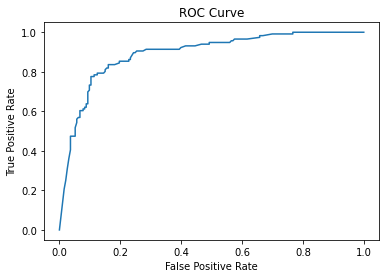

The AUC Score is: 0.89

The Classification Score is:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       193
           1       0.79      0.79      0.79       116

    accuracy                           0.84       309
   macro avg       0.83      0.83      0.83       309
weighted avg       0.84      0.84      0.84       309

Accuracy: 0.84
Precision: 0.8
Recall: 0.79


In [214]:
rf_metric = metrics(rf_pred, rf)


In [215]:
classifier_list = {"Plain Decision Tree": {"Accuracy": dt_metric[0],
                                           "Precision": dt_metric[1],
                                           "Recall": dt_metric[2],
                                           "AUC Score": dt_metric[3]},
                   "Adjusted Decision Tree": {"Accuracy": dt_metric2[0],
                                           "Precision": dt_metric2[1],
                                           "Recall": dt_metric2[2],
                                           "AUC Score": dt_metric2[3]},
                   "Random Forest": {"Accuracy": rf_metric[0],
                                           "Precision": rf_metric[1],
                                           "Recall": rf_metric[2],
                                           "AUC Score": rf_metric[3]}}
classifier_list = pd.DataFrame(classifier_list)

classifier_list
# print(f"Plain Decision Tree: {dt_metric}\nAdjusted Decision Tree: {dt_metric2}\nRandom Forest: {rf_metric})"

,Plain Decision Tree,Adjusted Decision Tree,Random Forest
Accuracy,0.81,0.80,0.84
Precision,0.70,0.70,0.80
Recall,0.79,0.83,0.79
AUC Score,0.80,0.80,0.89


### Conclusion
- As we can see here that the Random Forest does the overall best due to its high scoring in almost all the criteria
- The Decision tree after being adjusted has a better recall score